<a href="https://colab.research.google.com/github/fairdown/data_analise/blob/master/CovidRjAraruama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Buscando Casos de COVID-19 no Estado do Rio de Janeiro

In [0]:
import pandas as pd
covid = pd.read_csv("/content/covid19-4389703db6fc4694823124b5f8d641b4.csv")
covid.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-03,RJ,Angra dos Reis,city,56,0,True,203785.0,3300100.0,27.47994,0.0000
1,2020-05-03,RJ,Aperibé,city,2,0,True,11759.0,3300159.0,17.00825,0.0000
2,2020-05-03,RJ,Araruama,city,33,1,True,132400.0,3300209.0,24.92447,0.0303
3,2020-05-03,RJ,Areal,city,3,0,True,12572.0,3300225.0,23.86255,0.0000
4,2020-05-03,RJ,Armação dos Búzios,city,13,0,True,33870.0,3300233.0,38.38205,0.0000


#Ajustando Colunas

In [0]:
covid_ref = covid[['date', 'city', 'confirmed', 'deaths', 'estimated_population_2019', 'confirmed_per_100k_inhabitants']]
covid_ref.columns = ['data', 'cidade', 'casos', 'mortes', 'populacao', 'habitantes_por_100k' ]
covid = covid_ref.dropna()
covid.head()

,data,cidade,casos,mortes,populacao,habitantes_por_100k
0,2020-05-03,Angra dos Reis,56,0,203785.0,27.47994
1,2020-05-03,Aperibé,2,0,11759.0,17.00825
2,2020-05-03,Araruama,33,1,132400.0,24.92447
3,2020-05-03,Areal,3,0,12572.0,23.86255
4,2020-05-03,Armação dos Búzios,13,0,33870.0,38.38205


#Buscando Dados da Cidade de Araruama

In [0]:
covid_araruama = covid.query("cidade=='Araruama'")
covid_casos_araruama = covid_araruama[["data", "casos", "mortes"]]
covid_casos_araruama.head()

,data,casos,mortes
2,2020-05-03,33,1
87,2020-05-02,33,1
172,2020-05-01,33,1
256,2020-04-30,31,1
339,2020-04-29,31,1


#Gerando Gráfico

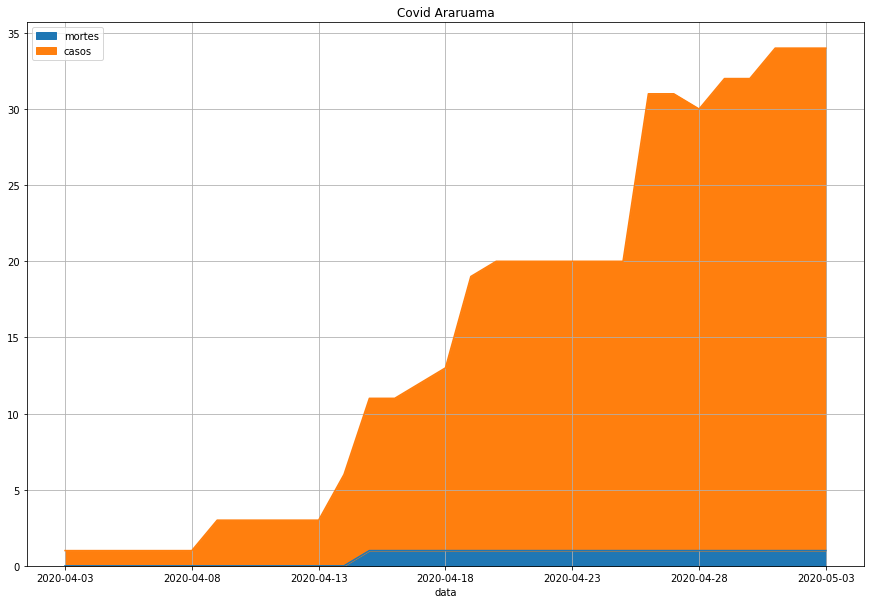

In [0]:
covid_casos_araruama = covid_casos_araruama.sort_values(by="data")
covid_casos_araruama.plot.area(x="data", y=["mortes", "casos"], figsize=(15,10), title="Covid Araruama", grid=True)